In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
spotify_df=pd.read_csv(r'Dataset\spotify_songs.csv')

In [3]:
spotify_df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [4]:
spotify_df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [5]:
spotify_df['playlist_genre'].value_counts()

playlist_genre
pop      3993
rock     3521
rap      3391
r&b      3326
latin    2178
edm      2045
Name: count, dtype: int64

In [6]:
spotify_df['playlist_subgenre'].value_counts()

playlist_subgenre
indie poptimism              1288
southern hip hop             1158
neo soul                     1001
electropop                    964
urban contemporary            936
hard rock                     926
classic rock                  924
post-teen pop                 891
new jack swing                881
gangster rap                  865
dance pop                     850
permanent wave                843
album rock                    828
hip hop                       689
trap                          679
latin hip hop                 673
progressive electro house     652
latin pop                     594
pop edm                       575
hip pop                       508
electro house                 484
tropical                      473
reggaeton                     438
big room                      334
Name: count, dtype: int64

In [7]:
spotify_df.isna().sum()

track_id                      0
track_name                    0
track_artist                  0
lyrics                      260
track_popularity              0
track_album_id                0
track_album_name              0
track_album_release_date      0
playlist_name                 0
playlist_id                   0
playlist_genre                0
playlist_subgenre             0
danceability                  0
energy                        0
key                           0
loudness                      0
mode                          0
speechiness                   0
acousticness                  0
instrumentalness              0
liveness                      0
valence                       0
tempo                         0
duration_ms                   0
language                    260
dtype: int64

In [8]:
spotify_df.duplicated().sum()

np.int64(0)

In [9]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

In [10]:
spotify_df=spotify_df.drop('language',axis=1)

In [11]:
spotify_df['Release_Date'] = pd.to_datetime(spotify_df['track_album_release_date'], errors='coerce')

In [12]:
spotify_df['Release_Date'].head()

0   2001-01-01
1   2017-11-21
2   2005-01-01
3   2012-10-29
4   2019-09-22
Name: Release_Date, dtype: datetime64[ns]

In [13]:
spotify_df=spotify_df.drop('track_album_release_date',axis=1)

In [14]:
mood=pd.DataFrame(spotify_df[['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

In [15]:
mood['mode'].astype('category')

0        1
1        1
2        0
3        0
4        1
        ..
18449    0
18450    1
18451    0
18452    0
18453    1
Name: mode, Length: 18454, dtype: category
Categories (2, int64): [0, 1]

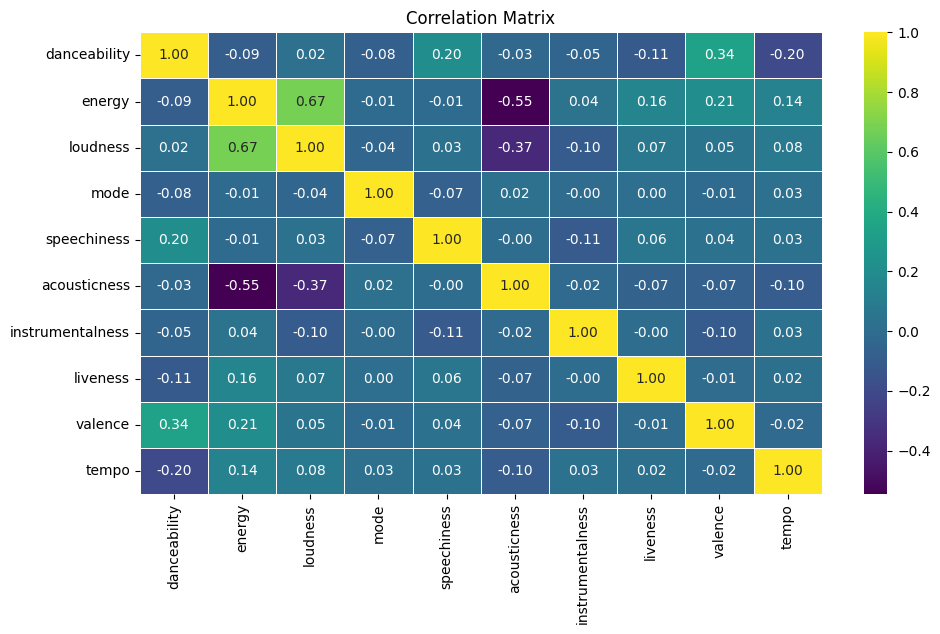

In [16]:
plt.figure(figsize=(11,6))
mood_corr=mood.corr()
sns.heatmap(mood_corr,annot=True,cmap='viridis',fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
print(mood_corr)

                  danceability    energy  loudness      mode  speechiness  \
danceability          1.000000 -0.089708  0.022830 -0.078020     0.204041   
energy               -0.089708  1.000000  0.674795 -0.009903    -0.011986   
loudness              0.022830  0.674795  1.000000 -0.035276     0.029858   
mode                 -0.078020 -0.009903 -0.035276  1.000000    -0.070013   
speechiness           0.204041 -0.011986  0.029858 -0.070013     1.000000   
acousticness         -0.029240 -0.546033 -0.370628  0.022191    -0.000217   
instrumentalness     -0.049187  0.042093 -0.099164 -0.002906    -0.108365   
liveness             -0.114719  0.156931  0.071159  0.004850     0.060072   
valence               0.343419  0.207941  0.050211 -0.009382     0.035202   
tempo                -0.201465  0.138291  0.082558  0.026421     0.033620   

                  acousticness  instrumentalness  liveness   valence     tempo  
danceability         -0.029240         -0.049187 -0.114719  0.343419 -0

In [18]:
spotify_df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'Release_Date'],
      dtype='object')

In [19]:
music_df=spotify_df[['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id','track_album_name','playlist_name','playlist_id','playlist_genre','playlist_subgenre','duration_ms', 'Release_Date','danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','key']]

In [ ]:
# music_df.to_csv(r'Dataset\music_df.csv',index=False)

In [21]:
music_df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id',
       'playlist_genre', 'playlist_subgenre', 'duration_ms', 'Release_Date',
       'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'key'],
      dtype='object')

In [61]:
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# Load the processed dataset
music_df = pickle.load(open('music_df.pkl', 'rb'))

# Select features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(music_df[features])

dbscan = DBSCAN(eps=0.5, min_samples=10)
music_df['cluster'] = dbscan.fit_predict(scaled_features)


In [62]:
num_clusters = len(set(music_df['cluster'])) - (1 if -1 in music_df['cluster'] else 0)
num_noise_points = (music_df['cluster'] == -1).sum()

print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")


Number of clusters found: 2
Number of noise points: 5


In [60]:
from sklearn.metrics import silhouette_score

if num_clusters > 1:
    silhouette = silhouette_score(scaled_features, music_df['cluster'])
    print(f"Silhouette Score: {silhouette}")
else:
    print("Silhouette Score cannot be calculated (only one cluster or all noise).")


Silhouette Score: 0.5325997974569889


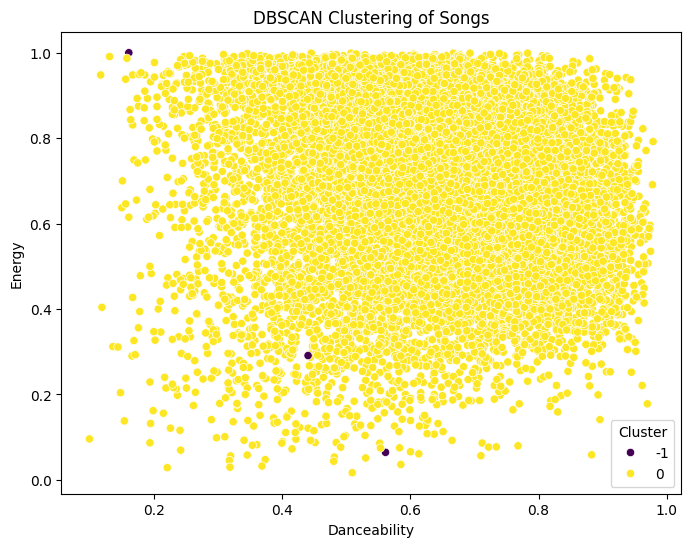

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=music_df['danceability'], y=music_df['energy'], hue=music_df['cluster'], palette='viridis')
plt.title('DBSCAN Clustering of Songs')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Cluster')
plt.show()


In [67]:
import pickle

with open('dbscan_model.pkl', 'wb') as f:
    pickle.dump(dbscan, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("DBSCAN model and scaler saved successfully!")


DBSCAN model and scaler saved successfully!


In [ ]:
#lyrics = spotify_df[['track_name', 'track_artist', 'lyrics']].dropna().reset_index(drop=True)

# Genre Data
#Genre = spotify_df[['playlist_genre', 'playlist_subgenre']]

In [ ]:
# lyrics = lyrics[lyrics['lyrics'].str.strip().astype(bool)]
# vectorizer = TfidfVectorizer(stop_words='english')
# tfidf_matrix = vectorizer.fit_transform(lyrics['lyrics'])
# cosine_ly_sim = cosine_similarity(tfidf_matrix)

In [ ]:
# scaler = StandardScaler()
# mood_scaled = scaler.fit_transform(mood)
# cosine_mood_sim = cosine_similarity(mood_scaled)

In [ ]:
# encoder = OneHotEncoder()
# Genre_encoded = encoder.fit_transform(Genre).toarray()
# cosine_genre_sim = cosine_similarity(Genre_encoded)

In [ ]:
# import numpy as np

# def get_similar_indices(song_index, top_n, similarity_matrix, include_self=True):
    
#     similar_indices = np.argsort(similarity_matrix[song_index])[::-1]
    
#     # Exclude the song itself if needed
#     if not include_self:
#         similar_indices = similar_indices[similar_indices != song_index]

#     return similar_indices[:top_n]


In [ ]:
# genre_similarity_mapping = {}
# mood_similarity_mapping = {}
# lyrics_similarity_mapping = {}

# songs_count = len(lyrics)  # Total number of songs in the dataset

# for i in range(songs_count):
#     genre_similarity_mapping[i] = get_similar_indices(i, 20, cosine_genre_sim, False)
#     mood_similarity_mapping[i] = get_similar_indices(i, 20, cosine_mood_sim, False)
#     lyrics_similarity_mapping[i] = get_similar_indices(i, 20, cosine_ly_sim, False)


In [ ]:
# pickle.dump(music_df, open('music_df.pkl', 'wb'))
# pickle.dump(lyrics_similarity_mapping, open('lyrics_similarity_mapping.pkl', 'wb'))
# pickle.dump(mood_similarity_mapping, open('mood_similarity_mapping.pkl', 'wb'))
# pickle.dump(genre_similarity_mapping, open('genre_similarity_mapping.pkl', 'wb'))